In [1]:
from IPython.display import display, Image, Video, HTML as ht, Markdown as md
from pdf2image import convert_from_path
opts = dict(first_page=2,transparent=True, size=(800))
a_p = convert_from_path('pdfs/N3_8_patrones_recorrido.pdf', **opts)
b_p = convert_from_path('pdfs/N3_9_listas_ejercicios.pdf', **opts)
c_p = convert_from_path('pdfs/N3_11_datos_complejos_diccionarios_de_diccionarios_archivos.pdf',**opts)
presentations = [c_p,b_p,a_p]
pres = c_p
pres_num = 0
page = -1

def p(skip=False):
    global page
    page += 1
    if skip:
        return None
    else:
         display(pres[page%len(pres)])

def switch():
    global pres_num
    global pres
    global page
    page = -1
    pres_num += 1
    pres = presentations[pres_num%len(presentations)]

# Nivel 3 - Repetir Acciones

## Archivos

### David Naranjo

### da-naran@uniandes.edu.co

# Dudas con la Tarea?

1. Moda en una cadena
2. Pig Latin
3. Escalas Musicales
4. Ash y la liga Kalos

### Pig Latin

El Pig Latin es un lenguaje construido a partir de la transformación de palabras en inglés. Aunque se desconoce el origen de dicho lenguaje, este es mencionado en al menos dos documentos del siglo XIX, lo cual sugiere que ha existido por más de cien años. Las siguientes son las reglas que se usan para traducir del inglés al Pig Latin: Si una palabra empieza por una consonante, todas las letras del inicio de la palabra, hasta la primera vocal, se eliminan y luego se agregan al final de la palabra, seguidas de “ay”. Por ejemplo, “computer” se traduce a “omputercay” y “think” se traduce a “inkthay”. Si una palabra inicia por vocal, se agrega “way” al final de la palabra. Por ejemplo, “algorithm” se traduce a “algorithmway” y “office” se convierte en “officeway”. Finalmente, si una palabra no tiene vocales (por ejemplo "my"), entonces no se cambia de ninguna forma. Cree una función que reciba como parámetro un texto (conformado por una o más palabras), y retorne la traducción de dicho texto a Pig Latin. Puede asumir que el texto ingresado por el usuario consiste solamente de palabras en minúscula y separadas por espacios.

In [8]:
def traducir_a_pig_latin(texto: str) -> str:
    palabras = texto.lower().split(" ")
    vocales = "aeiou"
    traduccion = []
    for palabra in palabras:
        if palabra[0] in vocales:
            traduccion.append(palabra + "way")
        else:
            i = 0
            vocal_encontrada = False
            while i < len(palabra) and vocal_encontrada==False:
                letra = palabra[i]
                if letra in vocales:
                    vocal_encontrada = True
                else:
                    i += 1
            if i == len(palabra):
                traduccion.append(palabra)
            else:
                cambiada = palabra[i:] + palabra[:i] + "ay"
                traduccion.append(cambiada)
    return " ".join(traduccion)

In [61]:
texto = "When you gaze out at the night sky, space seems to extend forever in all directions. That’s our mental model for the universe, but it’s not necessarily correct".replace(",","")
print(traducir_a_pig_latin(texto))

enwhay ouyay azegay outway atway ethay ightnay sky acespay eemssay otay extendway oreverfay inway allway irections.day at’sthay ourway entalmay odelmay orfay ethay universeway utbay it’sway otnay ecessarilynay orrectcay


### Ash y la liga Kalos

Ash Ketchum, el personaje principal del ánime "Pokémon", está a punto de luchar en la final de la liga Kalos. Estos son eventos en donde compiten los mejores entrenadores del mundo en batallas donde cada entrenador puede tener 3, 4, 5 o 6 criaturas. Ash quiere saber, para una cantidad de criaturas específica, si él podrá formar un equipo únicamente con Pokémons seudolegendarios para competir en la final. Un Pokémon seudolegendario es aquel en que la suma de sus estadísticas de combate es de al menos 600 puntos. Las estadísticas de cada Pokémon son 6: "ataque", "defensa", "ataque_especial", "defensa_especial", "velocidad" y "vida". Escriba una función que dada una lista de Pokémon (diccionarios con las anteriores estadísticas) determine si Ash podrá formar un equipo de Pokémon seudolegendarios para afrontar la final de la liga. De poderse, retorne una lista con los nombres de los Pokémon que Ash utilizaría en la batalla. Si es imposible generar un equipo que cumpla con las condiciones, retorne None. Se garantiza que, de poder formarse un equipo válido, solamente habrá una configuración posible. La lista de retorno debe componerse únicamente de cadenas de caracteres y debe tener el mismo órden de la lista que llega por parámetro. 

In [3]:
def construir_equipo_pokemon(cantidad:int, lista_pkmn:list)->list:
    return

### Escalas Musicales

"La 440", es una manera de llamar a la nota La que se encuentra justo a la derecha del Do central de un piano. Lleva este nombre pues su frecuencia es de 440 Hertz. Las otras notas La pueden encontrarse multiplicando o dividiendo a 440 por potencias de 2: el La de la octava que está antes del Do central tiene una frecuencia de 220 Hertz, mientras que el La de la octava siguiente tiene 880 Hertz. Usted debe construir una función que reciba una una lista de frecuencias en hertz y revise si en esta lista existen notas idénticas o notas que son la misma pero en otra escala (por ejemplo, los La representados por 110, 220, 440, 880 y 1760 hertz). Las frecuencias de las notas que nos interesan están entre 50 y 5000 hertz. 

In [49]:
def escala_musical(notas: list) -> str:
    mensaje = "No hay coincidencia"
    for nota in notas:
        if notas.count(nota) > 1:
            mensaje = "Hay una nota idéntica"
    if mensaje == "No hay coincidencia":
        for i in range(0, len(notas)):
            for j in range(i + 1, len(notas)):
                if notas[i] % notas[j] == 0 or notas[j] % notas[i] == 0:
                    mensaje = "Hay una nota en otra escala"
    return mensaje

In [52]:
print(escala_musical([100,100,330,440]))

Hay una nota idéntica


### Moda en una cadena

En este ejercicio usted deberá identificar la letra más común (o moda) en una cadena recibida por parámetro. Cree una función que reciba una cadena (str) que será analizada, y que retorne otra cadena (str) que contenga la letra más común en la cadena inicial. Para su facilidad las cadenas que usted recibirá solo contendrán letras mayúsculas y no tendrán tildes o acentos. No obstante estas sí pueden tener espacios, puntos y comas. En caso de que haya 2 letras con la misma cantidad de apariciones, debe retornar la que sea alfabéticamente posterior.

In [75]:
def letra_mas_comun(cadena: str) -> str:
    histograma = []
    cadena = cadena.replace(" ", "").replace(".", "").replace(",", "")
    for i in range(ord("A"), ord("Z") + 1):
        histograma.append(cadena.count(chr(i)))
    print(histograma)
    indice_mayor = 0
    for i in range(0, len(histograma)):
        if histograma[i] > histograma[indice_mayor]:
            indice_mayor = i
    return chr(ord("A") + indice_mayor)

In [76]:
print(letra_mas_comun('We can ask two separate but interrelated, questions about the shape of the universe.'.upper()))

[7, 2, 1, 1, 12, 1, 0, 3, 3, 0, 1, 1, 0, 4, 4, 2, 1, 4, 6, 9, 4, 1, 2, 0, 0, 0]
E


In [82]:
"aaaaabbbbbbcjksghdfkhdslghklasdjnkvjysghgjeilthst".count("j")

4

In [78]:
rep = {}
cadena = 'We can ask two separate but interrelated, questions about the shape of the universe.'.upper().replace(" ","")
for c in cadena:
    rep[c] = rep.get(c, 0) + 1

{'W': 1}
{'W': 1, 'E': 1}
{'W': 1, 'E': 1, 'C': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 1, 'N': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 2, 'N': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 1, 'K': 1}
{'W': 1, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 1, 'K': 1, 'T': 1}
{'W': 2, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 1, 'K': 1, 'T': 1}
{'W': 2, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 1, 'K': 1, 'T': 1, 'O': 1}
{'W': 2, 'E': 1, 'C': 1, 'A': 2, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 2, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 2, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1, 'P': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 3, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1, 'P': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 3, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1, 'P': 1, 'R': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 4, 'N': 1, 'S': 2, 'K': 1, 'T': 1, 'O': 1, 'P': 1, 'R': 1}
{'W': 2, 'E': 2, 'C': 1, 'A': 4, 'N': 1

# Diccionarios de Diccionarios

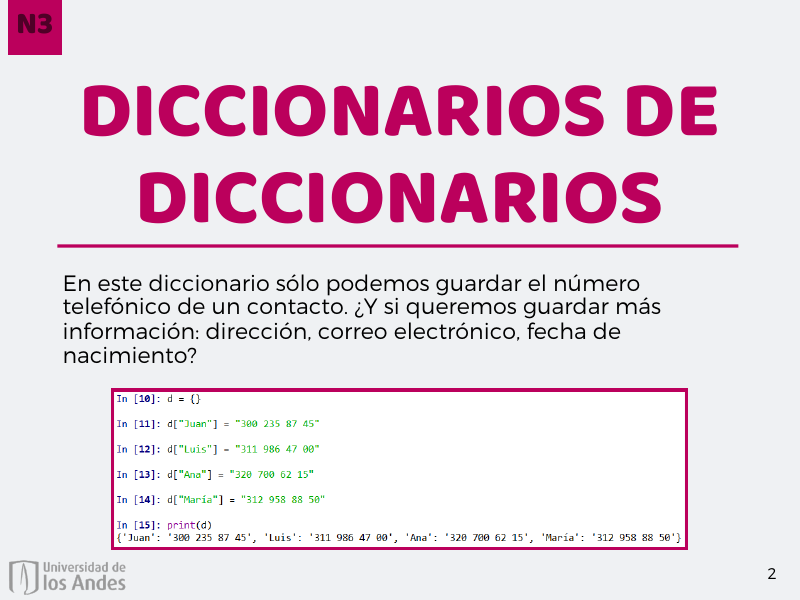

In [6]:
p()

In [7]:
p()

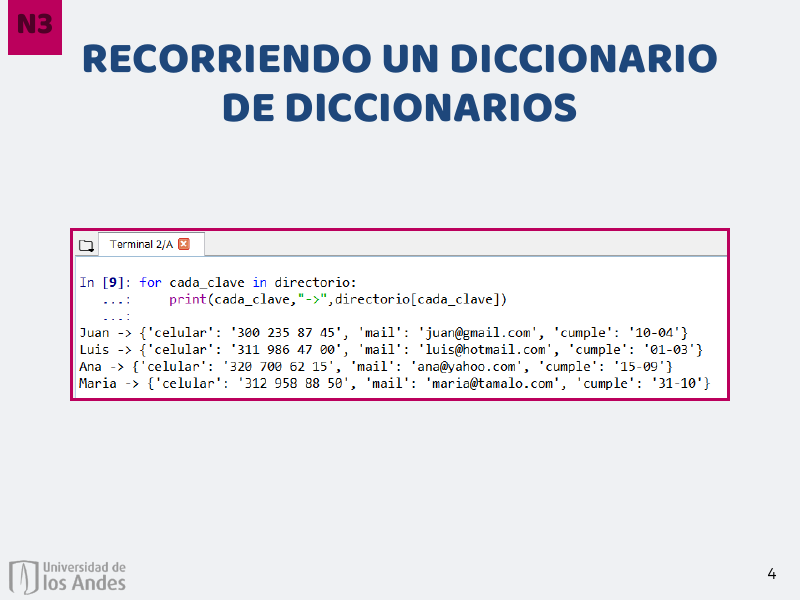

In [8]:
p()

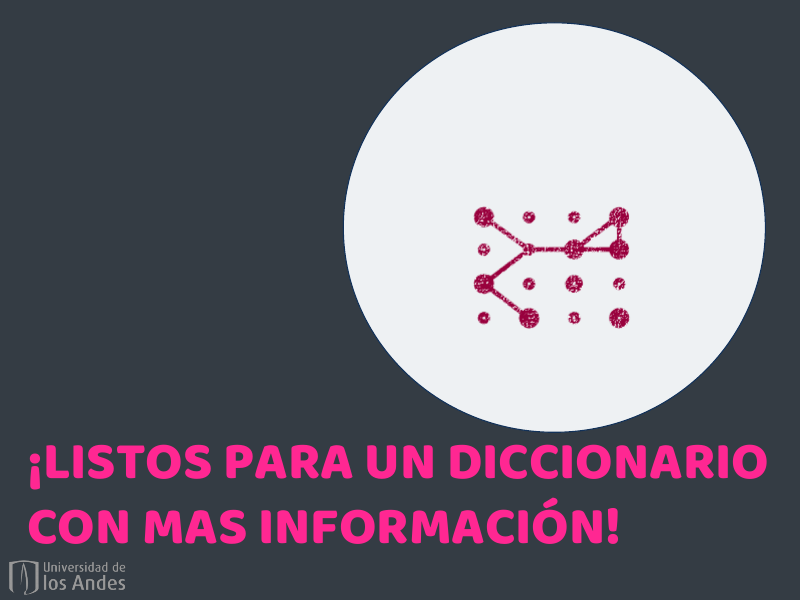

In [9]:
p()

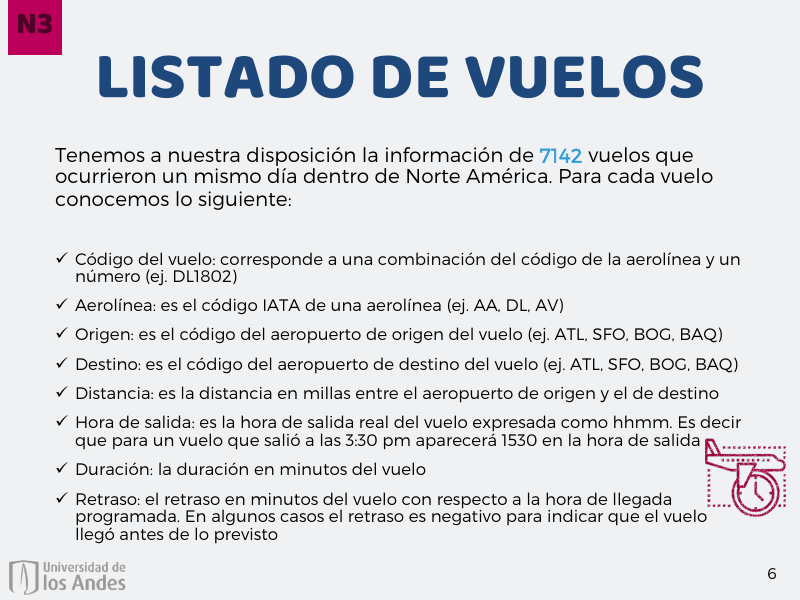

In [10]:
p()

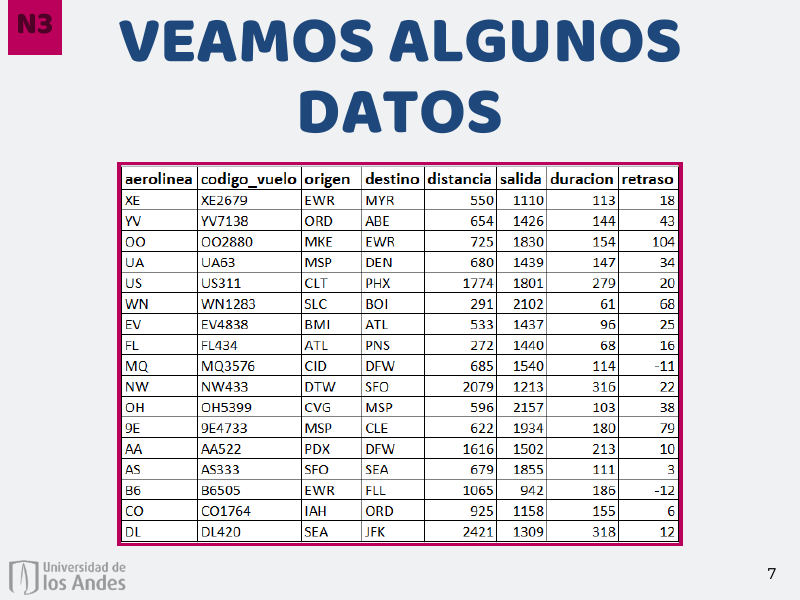

In [11]:
p()

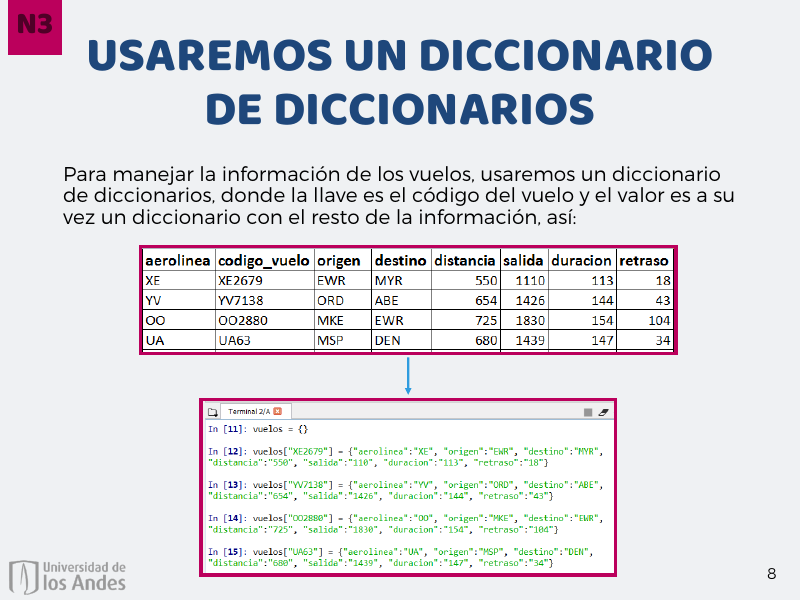

In [12]:
p()

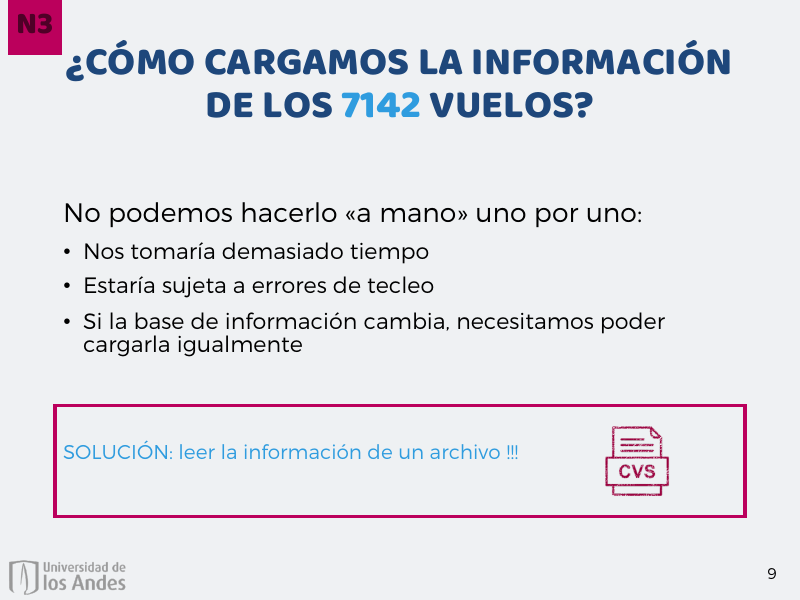

In [13]:
p()

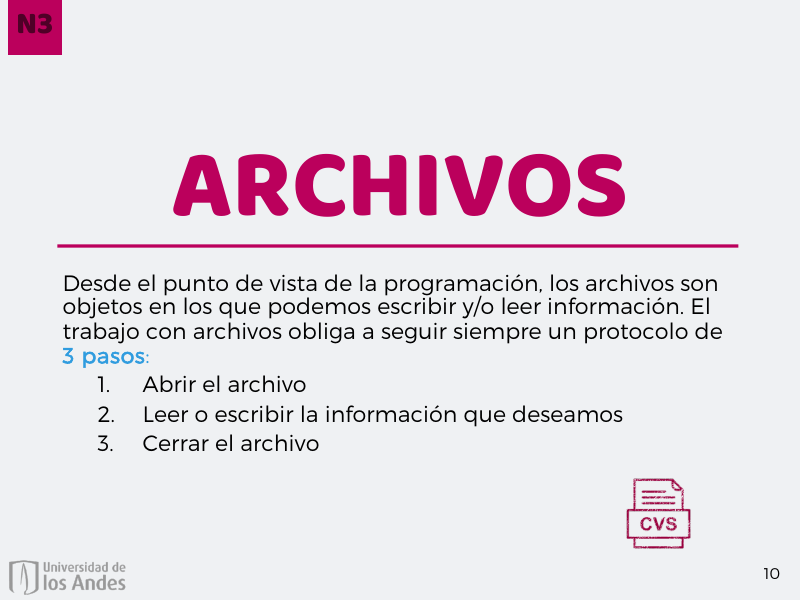

In [14]:
p()

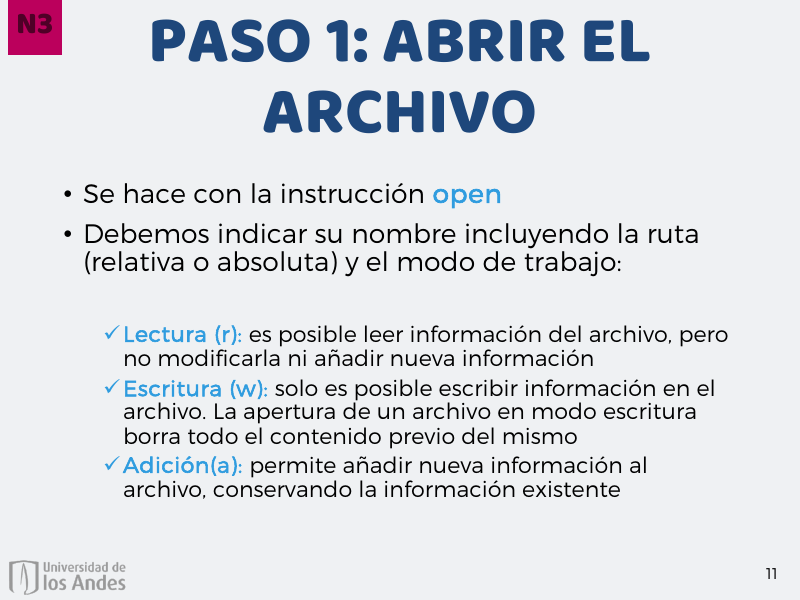

In [15]:
p()

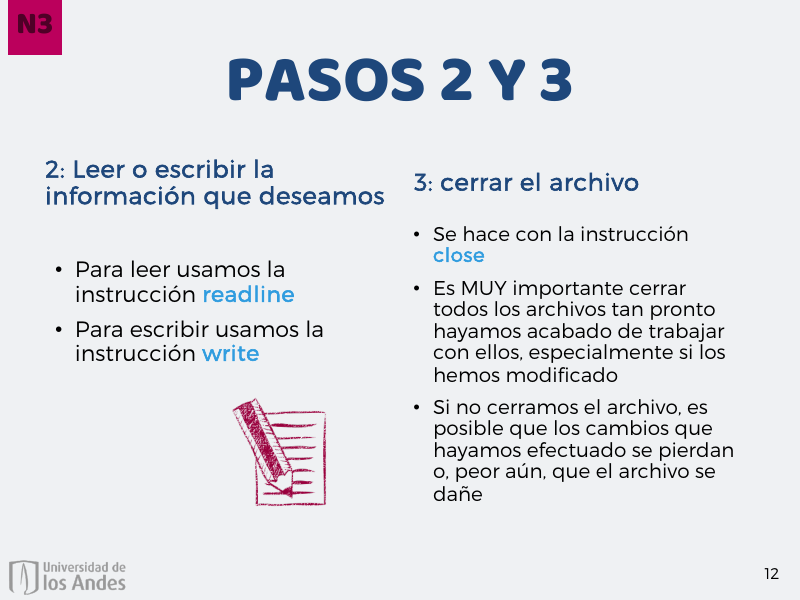

In [16]:
p()

In [17]:
p()

In [18]:
p()

In [68]:
vuelos = {}

Abrimos el archivo:

In [69]:
archivo = open("vuelos.csv", "r")

Leemos la primera línea:

In [70]:
titulos = archivo.readline()
print(titulos)

aerolinea,codigo_vuelo,origen,destino,distancia,salida,duracion,retraso



Leemos la segunda línea:

In [71]:
linea = archivo.readline()

Mientras existan líneas, hacemos algo con cada línea, y luego leemos la siguiente:

In [58]:
i=0
while i<10:
    print(linea.split(","))
    linea = archivo.readline()
    i+=1

['aerolinea', 'codigo_vuelo', 'origen', 'destino', 'distancia', 'salida', 'duracion', 'retraso\n']
['XE', 'XE2679', 'EWR', 'MYR', '550', '1110', '113', '18\n']
['XE', 'XE1', 'AUS', 'ONT', '1197', '755', '179', '33\n']
['XE', 'XE10', 'ONT', 'MCI', '1318', '1908', '178', '24\n']
['XE', 'XE103', 'COS', 'ONT', '789', '1108', '131', '33\n']
['XE', 'XE105', 'ELP', 'ONT', '670', '1151', '109', '17\n']
['XE', 'XE114', 'ONT', 'BOI', '660', '839', '114', '-3\n']
['XE', 'XE115', 'BOI', 'ONT', '660', '1216', '121', '5\n']
['XE', 'XE117', 'ONT', 'COS', '789', '1039', '126', '81\n']
['XE', 'XE119', 'TUS', 'ELP', '269', '1036', '54', '40\n']


Finalmente, cerramos el archivo:

In [63]:
archivo.close()

Si queremos volver a recorrer, nos toca volver a abrir el archivo:

In [73]:
archivo = open("vuelos.csv", "r")
archivo = open("vuelos.csv", "r")
linea = archivo.readline()
linea = archivo.readline()

In [74]:
while len(linea) > 0:
    datos = linea.split(",")
    vuelo = {}
    codigo_vuelo = datos[1]
    vuelo["aerolinea"] = datos[0]
    vuelo["origen"] = datos[2]
    vuelo["destino"] = datos[3]
    vuelo["distancia"] = datos[4]
    vuelo["salida"] = datos[5]
    vuelo["duracion"] = datos[6]
    vuelo["retraso"] = datos[7]
    vuelos[codigo_vuelo] = vuelo
    linea = archivo.readline()

archivo.close()
print(list(vuelos.values())[0:10])

[{'aerolinea': 'XE', 'origen': 'EWR', 'destino': 'MYR', 'distancia': '550', 'salida': '1110', 'duracion': '113', 'retraso': '18\n'}, {'aerolinea': 'XE', 'origen': 'AUS', 'destino': 'ONT', 'distancia': '1197', 'salida': '755', 'duracion': '179', 'retraso': '33\n'}, {'aerolinea': 'XE', 'origen': 'ONT', 'destino': 'MCI', 'distancia': '1318', 'salida': '1908', 'duracion': '178', 'retraso': '24\n'}, {'aerolinea': 'XE', 'origen': 'COS', 'destino': 'ONT', 'distancia': '789', 'salida': '1108', 'duracion': '131', 'retraso': '33\n'}, {'aerolinea': 'XE', 'origen': 'ELP', 'destino': 'ONT', 'distancia': '670', 'salida': '1151', 'duracion': '109', 'retraso': '17\n'}, {'aerolinea': 'XE', 'origen': 'ONT', 'destino': 'BOI', 'distancia': '660', 'salida': '839', 'duracion': '114', 'retraso': '-3\n'}, {'aerolinea': 'XE', 'origen': 'BOI', 'destino': 'ONT', 'distancia': '660', 'salida': '1216', 'duracion': '121', 'retraso': '5\n'}, {'aerolinea': 'XE', 'origen': 'ONT', 'destino': 'COS', 'distancia': '789', '

In [27]:
p()

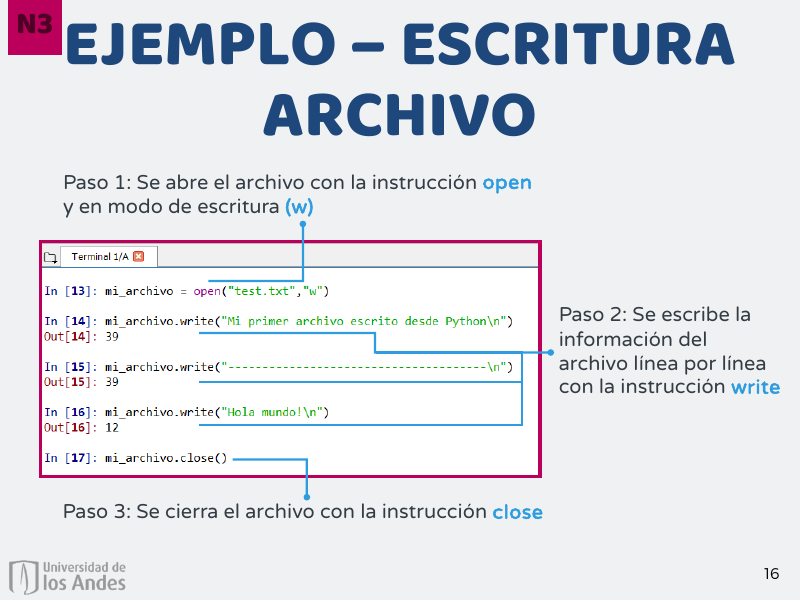

In [28]:
p()

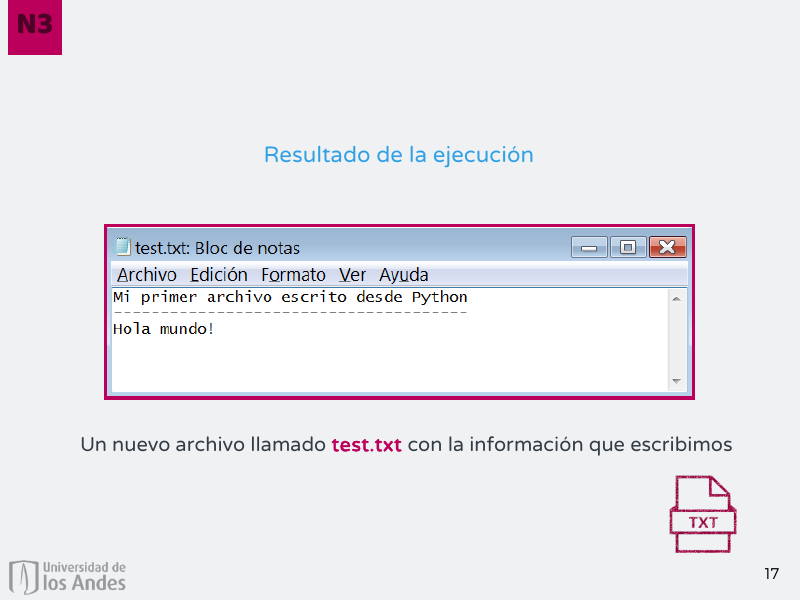

In [29]:
p()

## (Sobre)escritura

In [97]:
archivo = open("archivo_escritura.txt","w")

In [98]:
fruteria = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇", "🍓", "🍈", "🍒", "🍑", "🥭", "🍍", "🥥", "🥝", "🍅"]

In [99]:
for fruta in fruteria:
    archivo.write(fruta+"\n")

In [100]:
archivo.close()

## Adición

In [102]:
zoologico = "🐒🐛🦋🐌🐞🐜🦟🦗🕷🦂🐢🐍🦎🦖🦕🐙🦑🦐🦞🦀🐡🐠🐟🐬🐳🐋🦈🐊🐅🐆🦓🦍🐘🦛🦏🐪🐫🦒🦘🐃🐂🐄🐎🐖🐏🐑🦙🐐🦌🐕🐩🐈🐓🦃🦚🦜🦢🕊🐇🦝🦡🐀🐿🦔"

In [103]:
archivo = open("archivo_escritura.txt","a")

In [104]:
for animal in zoologico:
    archivo.write(animal)

In [105]:
archivo.close()

In [38]:
switch()
p()

In [39]:
p()

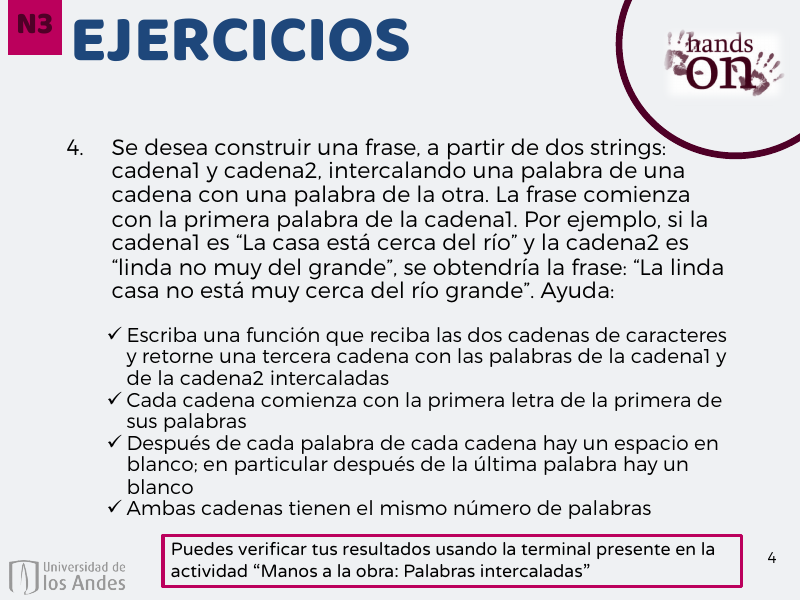

In [40]:
p()

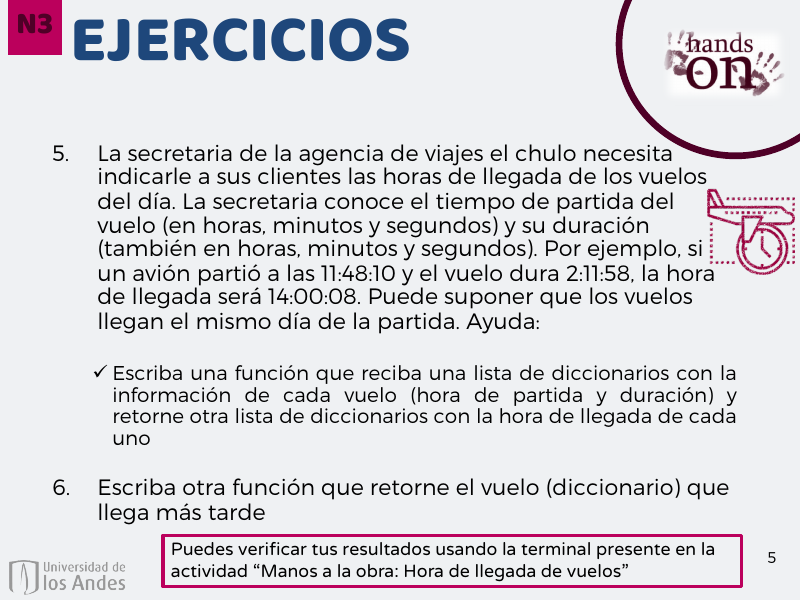

In [41]:
p()

1. Escriba una función que reciba por parámetro el código de un aeropuerto y el diccionario de vuelos y retorne una lista con los códigos de todos los vuelos que parten de ese aeropuerto.

In [42]:
#Punto 1
def dar_vuelos_salen_de(codigo_aeropuerto:str,vuelos:dict)->list:
    return None

2. Escriba una función que reciba por parámetro el código de una vuelo y el diccionario de vuelos y retorne un diccionario con la información del mismo. Si el vuelo no existe, la función retorna None.

In [43]:
#Punto 2
def buscar_vuelo(codigo_vuelo:str, vuelos:dict)->dict:
    return None

3. Escriba una función que reciba por parámetro el código IATA de una aerolínea y el diccionario de vuelos, y retorne el código del vuelo más largo de dicha aerolínea.

In [44]:
#Punto 3
def vuelo_mas_largo_aerolinea(iata:str, vuelos:dict)->str:
    return None

4. Escriba un programa que reciba por parámetro un diccionario de vuelos, un aeropuerto de origen y un aeropuerto destino y muestre al usuario: 
    * Todos los vuelos directos que van del aeropuerto de origen al aeropuerto de destino.
    * Todos los vuelos con una escala que van del aeropuerto de origen al aeropuerto de destino.
    * Antes de escribir el programa, plantee en palabras la estrategia de solución y discútala con su compañer@. Cuando hayan llegado a un acuerdo, defina cuántas y qué funciones necesita para resolver el problema, y luego sí empiece a programar.

In [45]:
#Punto 4
#Escriba su programa aquí

5. Escriba una función que retorne el aeropuerto más visitado, teniendo en cuenta tanto los vuelos que salen como los que llegan.

In [46]:
#Punto 5
def aeropuerto_mas_visitado(vuelos:dict)->str:
    return None

6. Escriba un programa que reciba por parámetro un diccionario de vuelos y retorne la aerolínea con más vuelos.

In [47]:
#Punto 6
#Escriba su programa aquí